# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [26]:
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [27]:
df['média'] = df.mean(axis=1)
df['diferença'] = df.p2-df.p1
df.style.format(precision=1, decimal=',')

,p1,p2,média,diferença
0,"7,0","7,9","7,5","1,0"
1,"2,9","5,1","4,0","2,2"
2,"2,3","1,0","1,6","-1,3"
3,"5,5","4,5","5,0","-1,0"
4,"7,2","8,9","8,1","1,7"
5,"4,2","3,4","3,8","-0,8"
6,"9,8","9,8","9,8","0,0"
7,"6,8","7,9","7,4","1,1"
8,"4,8","5,7","5,3","0,9"
9,"3,9","5,7","4,8","1,8"


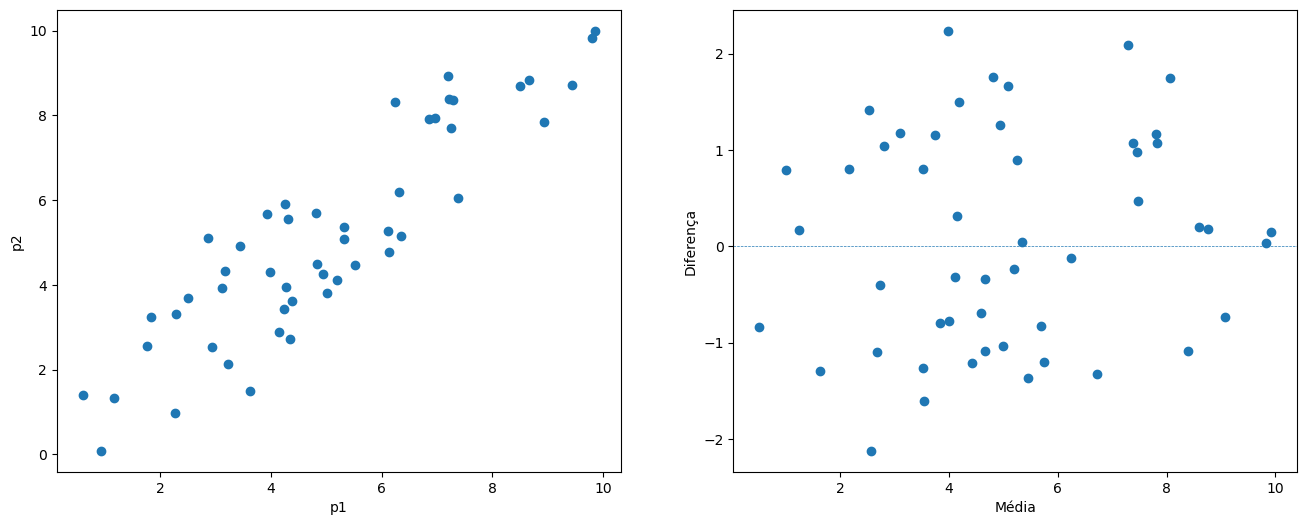

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

scatter1 = ax[0].scatter(x=df.p1, y=df.p2)
ax[0].set_xlabel('p1')
ax[0].set_ylabel('p2') 

scatter2 = ax[1].scatter(x=df['média'], y=df['diferença'])
ax[1].axhline(y=0, linewidth=0.5, linestyle='--')
ax[1].set_xlabel('Média') 
ax[1].set_ylabel('Diferença')

plt.show()


In [29]:
# Correlação entre p1 e p2
df.p1.corr(df.p2)

0.8957365818728046

forte correlação positiva entre p1 e p2 (próxima de 1).

In [30]:
# Correlação entre media e diferença
df['média'].corr(df['diferença'])

0.13347385411788837

Média e diferença possuem uma correlação muito fraca (próxima de 0).

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [31]:
df['soma'] = df.p2+df.p1
df.style.format(precision=1, decimal=',')

,p1,p2,média,diferença,soma
0,"7,0","7,9","7,5","1,0","14,9"
1,"2,9","5,1","4,0","2,2","8,0"
2,"2,3","1,0","1,6","-1,3","3,2"
3,"5,5","4,5","5,0","-1,0","10,0"
4,"7,2","8,9","8,1","1,7","16,1"
5,"4,2","3,4","3,8","-0,8","7,7"
6,"9,8","9,8","9,8","0,0","19,6"
7,"6,8","7,9","7,4","1,1","14,8"
8,"4,8","5,7","5,3","0,9","10,5"
9,"3,9","5,7","4,8","1,8","9,6"


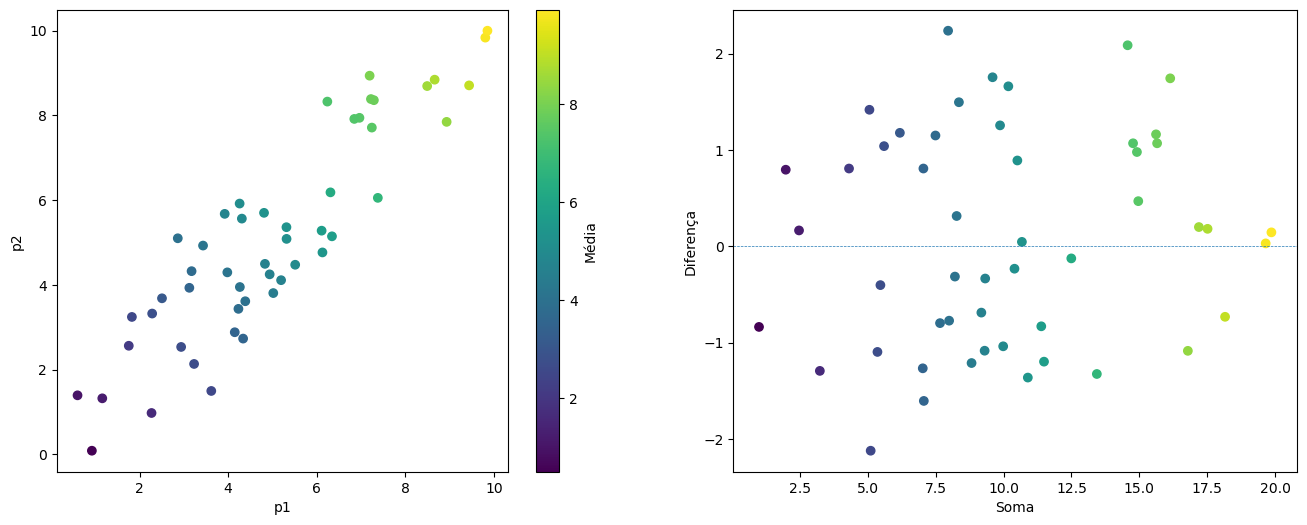

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

scatter1 = ax[0].scatter(x=df.p1, y=df.p2, c=df['média'])
ax[0].set_xlabel('p1') 
ax[0].set_ylabel('p2') 

cbar = fig.colorbar(scatter1, ax=ax[0])
cbar.set_label('Média') 

scatter2 = ax[1].scatter(x=df['soma'], y=df['diferença'], c=df['média'])
ax[1].axhline(y=0, linewidth=0.5, linestyle='--') 
ax[1].set_xlabel('Soma')  
ax[1].set_ylabel('Diferença')  

plt.show()

Quando usamos os vetores de soma e de diferença, que apontam na mesma direção e sentido, os pontos transformados se espalham mais pelo eixo x. Isso contrasta com a transformação anterior, em que o vetor médio era perpendicular ao vetor de diferença, fazendo com que os pontos ficassem mais próximos da origem (0,0).